## CNN Model

### Importing necessary libraries

In [167]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D

from keras.utils import plot_model
#from keras.callbacks import Callback

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.python.client import device_lib
import matplotlib.pyplot as plt
import numpy as np


In [174]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.config.list_physical_devices('GPU'))

Num GPUs Available:  1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [176]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17830004474328084428,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 3044750132
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 10120403766882409416
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"]

In [111]:
# batch_size = 128
epochs = 50
num_classes = 11 #26
x_dimm, y_dimm = 3, 21

In [112]:
x_data = np.load('x_data.npy')
y_data = np.load('y_data.npy')

In [113]:
print(x_data.shape)
print(y_data.shape)

(98684, 21, 3)
(98684,)


In [114]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size = 0.85)

## Adding an extra dimension to the input data since Conv2D layer accepts a 4D tensor as input

In [115]:
x_train = x_train.reshape(x_train.shape[0], x_dimm, y_dimm, 1)
x_test = x_test.reshape(x_test.shape[0],    x_dimm, y_dimm, 1)

In [116]:
print("x_train = ", x_train.shape)
print("y_train = ",y_train.shape)

print("x_test  = ",x_test.shape)
print("y_train = ",y_train.shape)

x_train =  (83881, 3, 21, 1)
y_train =  (83881,)
x_test  =  (14803, 3, 21, 1)
y_train =  (83881,)


## One-hot encoding the y labels

In [117]:
encoder = LabelBinarizer()
y_train_cat = encoder.fit_transform(y_train)
y_test_cat  = encoder.fit_transform(y_test)

In [118]:
print("y_train_cat = ",y_train_cat.shape)
print("y_test_cat  = ",y_test_cat.shape)

y_train_cat =  (83881, 11)
y_test_cat  =  (14803, 11)


## Creating the baseline model.

In [119]:
def baseline_model():
    model = Sequential()
    
    model.add(Conv2D(32, 
                    kernel_size = (3,3),
                    activation = 'relu',
                    input_shape = x_train.shape[1:]))

    model.add(Flatten())
    
    model.add(Dense(400, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.1))
    
    #output layer
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss = 'categorical_crossentropy',
                 optimizer = 'adam',
                 metrics = ['accuracy'])
    
    print(model.summary())
    return model

In [120]:
baseline = baseline_model()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 1, 19, 32)         320       
_________________________________________________________________
flatten_5 (Flatten)          (None, 608)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 400)               243600    
_________________________________________________________________
dropout_3 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 200)               80200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 50)              

In [177]:
baseline_log = baseline.fit(x_train, 
             y_train_cat, 
             batch_size = 32, 
             epochs = epochs, 
             validation_split = 0.2,
             verbose=1)

Epoch 1/50
2622/2622 [==============================] - 47s 14ms/step - loss: 0.0623 - accuracy: 0.9812
Epoch 2/50
2622/2622 [==============================] - 34s 13ms/step - loss: 0.0578 - accuracy: 0.9813
Epoch 3/50
2622/2622 [==============================] - 33s 13ms/step - loss: 0.0569 - accuracy: 0.9823
Epoch 4/50
2622/2622 [==============================] - 34s 13ms/step - loss: 0.0572 - accuracy: 0.9819
Epoch 5/50
2622/2622 [==============================] - 34s 13ms/step - loss: 0.0552 - accuracy: 0.9824
Epoch 6/50
2622/2622 [==============================] - 34s 13ms/step - loss: 0.0555 - accuracy: 0.9823
Epoch 7/50
2622/2622 [==============================] - 33s 13ms/step - loss: 0.0520 - accuracy: 0.9834
Epoch 8/50
2622/2622 [==============================] - 33s 13ms/step - loss: 0.0527 - accuracy: 0.9834
Epoch 9/50
2622/2622 [==============================] - 34s 13ms/step - loss: 0.0521 - accuracy: 0.9832
Epoch 10/50
2622/2622 [==============================] - 33s 13m

## Function to plot the accuracy and loss of a model

In [122]:
def plot_accuracy(model, history):
    eval_loss, eval_accuracy = model.evaluate(x_test, y_test_cat, verbose = 0)
    #print(history.history['loss'])
    print("Train loss          = ", history.history['loss'][-1])
    print("Train accuracy      = ", history.history['accuracy'][-1])
    print()
    print("Validation loss     = ", history.history['val_loss'][-1])
    print("Validation accuracy = ", history.history['val_accuracy'][-1])
    print()
    print("test loss           = ",eval_loss)
    print("test accuracy       = ",eval_accuracy)
    plt.subplot(2,1,1)
    
    plt.title('Model Accuracy')
    plt.plot(range(epochs), history.history['accuracy'])
    plt.plot(range(epochs), history.history['val_accuracy'])

    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='lower right')

    plt.subplot(2,1,2)
    plt.title('Model loss')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='lower right')

    plt.tight_layout()

Train loss          =  0.05207665264606476
Train accuracy      =  0.9830114245414734

Validation loss     =  0.07764984667301178
Validation accuracy =  0.9802110195159912

test loss           =  0.07859329879283905
test accuracy       =  0.9778423309326172


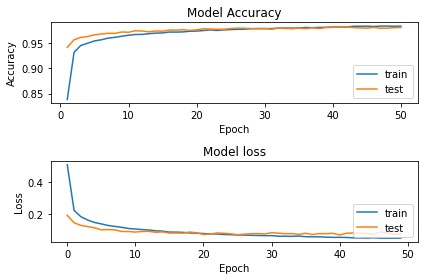

In [123]:
plot_accuracy(baseline, baseline_log)

In [179]:
baseline.save("baseline.model", save_format="h5")